In [1]:
import json
import pandas as pd
today = "2019-03-24"

In [2]:
import json
def read_json(filename):
    with open(filename, "r") as f:
        return json.load(f)

In [3]:
# list of arrays for each model.
# DIR = "./"
DIR = f"./out/{today}/"
DIR = f"out/{today}/out/"
cv_results = {alg: read_json(DIR + f"{today}-{alg}-cv_results.json") for alg in ["hyperband", "hyperband-w-patience", "patience"]}

# list of arrays with each score/time/etc. Each model entered more than once.

# ordered by adaptive-ness
history = read_json(DIR + f"{today}-hyperband-w-patience-history.json")

In [4]:
df = pd.DataFrame(history)
df.head()

,bracket,elapsed_wall_time,estimator_id,params,partial_fit_calls,partial_fit_time,score,score_time
0,0,15.270306,bracket=0-0,"{'train_split': None, 'optimizer__weight_decay...",1,2.226943,-0.672419,0.808640
1,0,15.270308,bracket=0-1,"{'train_split': None, 'optimizer__weight_decay...",1,2.188463,-0.672667,1.122812
2,0,15.270308,bracket=0-2,"{'train_split': None, 'optimizer__weight_decay...",1,2.036705,-0.255669,1.164697
3,0,15.270308,bracket=0-3,"{'train_split': None, 'optimizer__weight_decay...",1,2.025265,-0.264378,1.160277
4,0,15.270309,bracket=0-4,"{'train_split': None, 'optimizer__weight_decay...",1,2.342874,-0.527897,1.144608


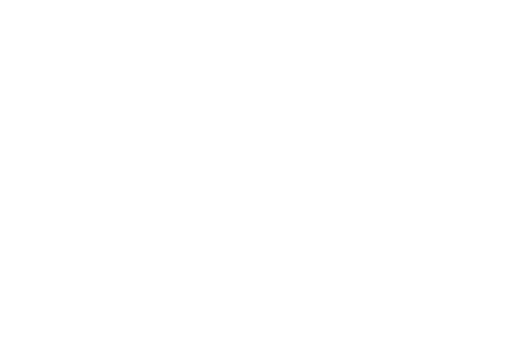

In [5]:
import altair as alt
alt.Chart(df).mark_line(point=True).encode(
    y=alt.Y("partial_fit_calls", scale=alt.Scale(type="log")),
    x=alt.X("elapsed_wall_time", scale=alt.Scale(type="log")),
    color="bracket:N",
)

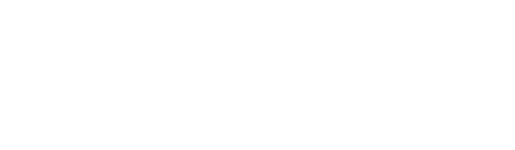

In [12]:
alt.Chart(df).mark_circle().encode(
    x=alt.X("elapsed_wall_time"),
    y="bracket:N",
    color="bracket:N",
)